<a href="https://colab.research.google.com/github/maielhadad99/HEART_FAILURE_PRED/blob/main/Heart_Kaggle_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data=pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df=data.select_dtypes(include=['float64','int64'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape


(303, 14)

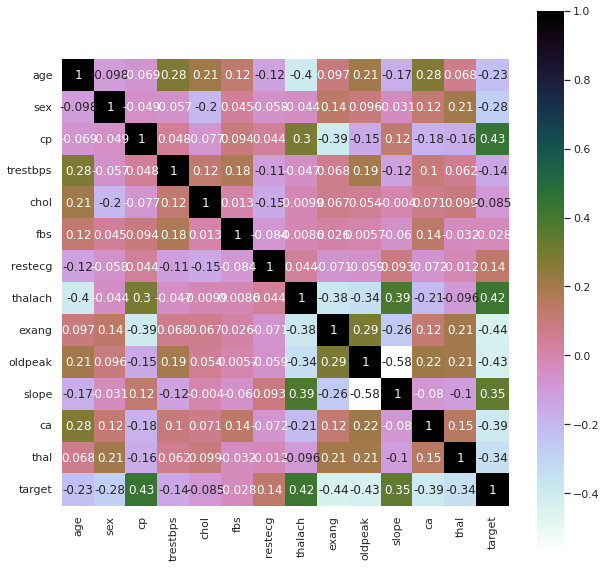

In [ ]:
# Heatmap
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

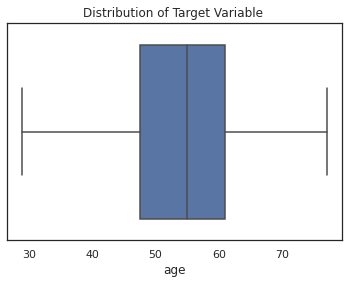

In [ ]:
sns.boxplot(df['age'])
plt.title('Distribution of Target Variable ')
plt.show()

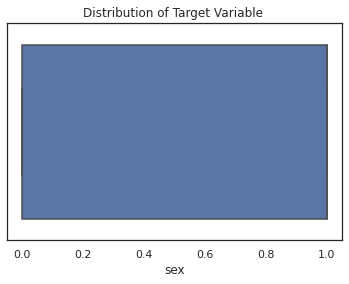

In [ ]:
sns.boxplot(df['sex'])
plt.title('Distribution of Target Variable ')
plt.show()

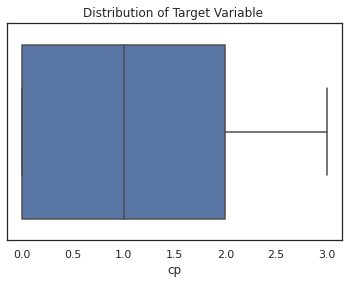

In [ ]:
sns.boxplot(df['cp'])
plt.title('Distribution of Target Variable ')
plt.show()

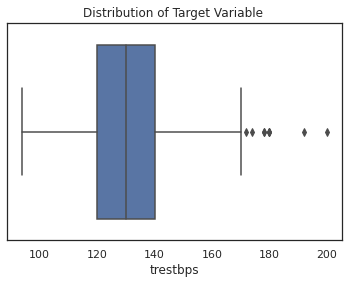

In [ ]:
sns.boxplot(df['trestbps'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
Q1=120.0
Q3=140.0
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)
df=df[df.trestbps<up_lim]
df=df[df.trestbps>low_lim]


low limit: 90.0
upper limit: 170.0


In [ ]:
df[(df['trestbps']>90.0)|(df['trestbps']>170.0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


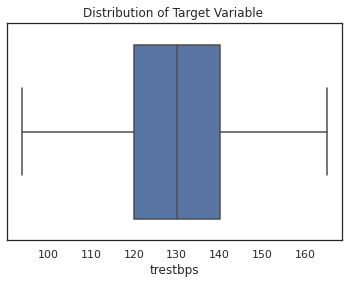

In [ ]:
sns.boxplot(df['trestbps'])
plt.title('Distribution of Target Variable ')
plt.show()

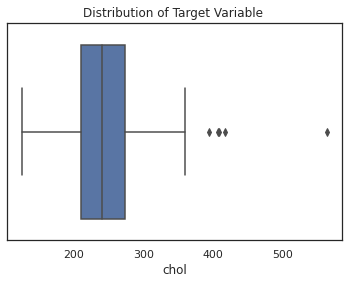

In [ ]:
sns.boxplot(df['chol'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
Q1 = np.percentile(df['chol'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['chol'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['chol'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.chol<up_lim]
df=df[df.chol>low_lim]

low limit: 116.75
upper limit: 366.75


In [ ]:
df.shape

(285, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['chol'] = np.where(
    df['chol']>up_lim,
    up_lim,
    np.where(
        df['chol']<low_lim,
        low_lim,
        df['chol']
    )
)

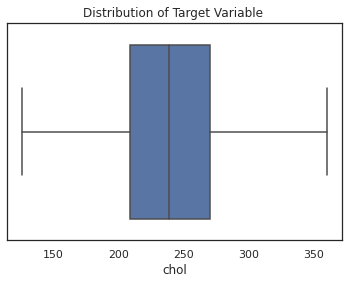

In [ ]:
sns.boxplot(df['chol'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

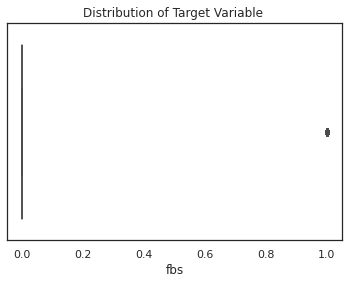

In [ ]:
sns.boxplot(df['fbs'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
df.fbs

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 285, dtype: int64

In [ ]:
df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 285, dtype: int64

In [ ]:
miss_val=df.isna().sum()
miss_val

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

In [ ]:
train_x=train.drop(['target'],axis=1)
train_y=train['target']

test_x=test.drop(['target'],axis=1)
test_y=test['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)
y_pred=model.predict(test_x)
LR=model.score(test_x,test_y)
LR

0.875

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)
pred
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 83.33%
